## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from tensorflow import keras
import glob
import matplotlib.pyplot as plt

In [2]:
import cv2
import os
def load_images(image):
    images = []
    for filename in os.listdir(image):
        if filename.endswith('.png'):
            img = cv2.imread(os.path.join(image, filename))
            images.append(img)
    return images
images=load_images(image=r'C:\Users\ASUS TUF\Demo Project\Gait\001\bg-01\000')

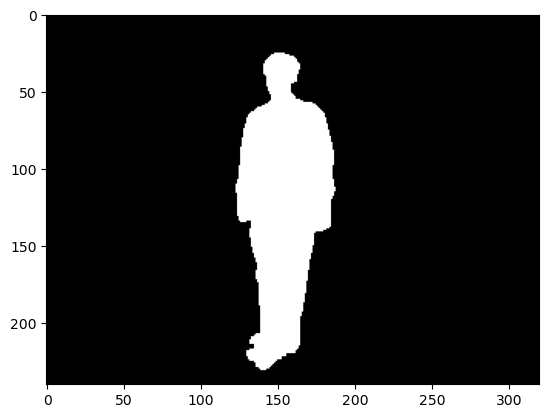

In [3]:
plt.imshow(images[88])

In [6]:
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset_dir = r'C:\Users\ASUS TUF\Demo Project\DATASETidentification'

images = []
labels = []
image_extensions = ['.png', '.jpg', '.jpeg']

if os.path.exists(dataset_dir):
    for folder_name in ['train', 'val', 'test']:
        folder_path = os.path.join(dataset_dir, folder_name)

        if os.path.isdir(folder_path):
            for subfolder_name in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, subfolder_name)

                if os.path.isdir(subfolder_path):
                    files = os.listdir(subfolder_path)

                    for image_name in files:
                        if any(image_name.lower().endswith(ext) for ext in image_extensions):
                            image_path = os.path.join(subfolder_path, image_name)

                            try:
                                with Image.open(image_path) as img:
                                    img = img.convert('RGB').resize((224, 224)) 
                                    images.append(np.array(img))
                                    labels.append(f"{folder_name}/{subfolder_name}")
                            except Exception:
                                continue  

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

images_array = np.array(images)
labels_array = np.array(labels_encoded)



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

train_dir = r'C:\Users\ASUS TUF\Demo Project\DATASETidentification\train'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,         
    seed=123,         
)

class_names = train_dataset.class_names


Found 9511 files belonging to 124 classes.


In [10]:

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)), 
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 124)                 │          15,996 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,184,956 (42.67 MB)

 Trainable params: 11,184,956 (42.67 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

history = model.fit(train_dataset, epochs=4) 


Epoch 1/4
298/298 ━━━━━━━━━━━━━━━━━━━━ 166s 552ms/step - accuracy: 0.0558 - loss: 4.5263
Epoch 2/4
298/298 ━━━━━━━━━━━━━━━━━━━━ 156s 525ms/step - accuracy: 0.6059 - loss: 1.4963
Epoch 3/4
298/298 ━━━━━━━━━━━━━━━━━━━━ 156s 522ms/step - accuracy: 0.8615 - loss: 0.4828
Epoch 4/4
298/298 ━━━━━━━━━━━━━━━━━━━━ 159s 534ms/step - accuracy: 0.9354 - loss: 0.2114


In [12]:
test_dir = r'C:\Users\ASUS TUF\Demo Project\DATASETidentification\test'

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  
    batch_size=32,          
    seed=123,              
)
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
model.save('best_model.h5')

Found 2726 files belonging to 124 classes.
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.9514 - loss: 0.1790


Test Loss: 0.1896
Test Accuracy: 0.9486


In [14]:
model.save('path_to_save_model.h5') 

In [15]:
model.save('my_model.keras')